<a href="https://colab.research.google.com/github/roniel06/python_ml_exc/blob/main/Decision_Tree_Pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Pruning
## Author: Roniel Polanco
Based in FuseMachines Resources

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree



In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y= np.array([0,1,1,0])
print("X: {}".format(X))
print("y: {}".format(y))

X: [[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 1 1 0]


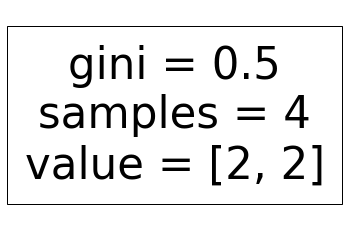

In [3]:
clf = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=12)
clf.fit(X,y)
_ = plot_tree(clf, filled=True)


### Set to Default min impurity

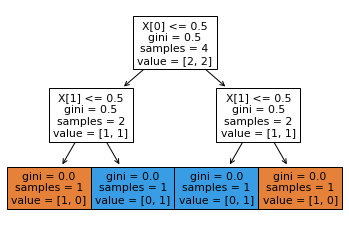

In [4]:
clf = DecisionTreeClassifier( random_state=12)
clf.fit(X,y)
_ = plot_tree(clf, filled=True)

## Obtaining the weakest link

The cost-complexity pruning technique compares the performance of a series of trees on the validation dataset
to obtain an optimal tree. However, to obtain a series of trees, we need to locate the node that forms the
weakest link, and then prune it. The weakest link of the tree is characterized by a node with the lowest value of
alpha.
In this section, let's see how to compute the value of , and obtain the weakest link.
For each node in tree:
1. Compute the error rate of a node. The error rate of any node ( ) is given as: 
<br/>
$r(t)=$ sum of samples misclassified in a node t / number of all samples in a node t  (clasification)

$r(t)=$ sum of squeared error of samples in node t / number of all samples in a node t (Regression)

<br/>
2. Compute the error cost of a node. The error cost of any node( ) is:
$$R(t)=r(t)*p(t)$$ 
where $p(t)$ is the proportion of samples at node t and is given as: 

$p(t) =$ number of all samples in a node t / total number of training samples

<br/>

3. The sub-tree rooted at node is defined as a collection of node and all of its descendants. The error
cost for a sub-tree rooted at node is given as: $R(T_{t}) = \sum R(i)$ where i= all leaves in sub-tree $T$ rooted at node t

4. Compute $\alpha $ of node $t$ as: 

$$\alpha_t = \frac{R(t) - R(T_t)}{N_t -1}$$

where $N_t$ is the number of nodes in subtree T.



In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


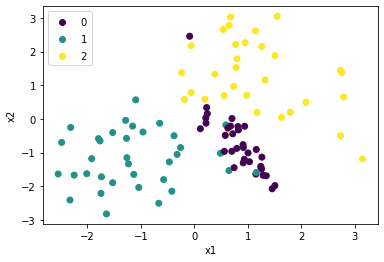

In [6]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=3, random_state=10, flip_y=0.02, class_sep=1, n_clusters_per_class=1)

scatter = plt.scatter(X[:,0], X[:,1], c=y)
plt.legend(*scatter.legend_elements(), loc=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


### Calculate Alphas
In sklearn, the decision tree has a parameter called ccp_alpha, which is equivalent to alpha( ).
DecisionTreeClassifier() provides cost_complexity_pruning_path() method that iteratively removes
the nodes from the bottom and gives the value of alpha corresponding to the different tree structures. By the
statement "alpha corresponding to the different tree structures", we mean the alpha of root node of different tree
structure. We will then use these values of alpha to train decision trees. Different values of alpha yields different
tree structure. We will then monitor the performance of these different trees on the validation dataset. The tree
with the best performance on the validation dataset is selected.


In [7]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12)


In [8]:
clf1 = DecisionTreeClassifier(random_state=12)
path = clf1.cost_complexity_pruning_path(X_train,y_train)
cpp_alphas = path.ccp_alphas
print(cpp_alphas)

[0.         0.01041667 0.01184211 0.0154321  0.02172271 0.0562037
 0.19857212 0.27627741]


These value of alpha corresponds to different tree structure. For instance, the lowest value of alpha, i.e.,
 corresponds to the fully grown decision tree and highest value of alpha, i.e.,
 $\alpha = 0.0$
corresponds to the root node. So we start from a fully grown decision tree, then iteratively removes the weakest
link until we are left with the single root node.

In [9]:
clfs =[]
for cpp in cpp_alphas:
  clf = DecisionTreeClassifier(random_state=12, ccp_alpha=cpp)
  clf.fit(X_train, y_train)
  clfs.append(clf)

train_scores = [clf.score(X_train,y_train) for clf in clfs]
valid_scores = [clf.score(X_test, y_test) for clf in clfs]

print(train_scores)
print(valid_scores)

[1.0, 0.9875, 0.975, 0.95, 0.925, 0.8875, 0.65, 0.3625]
[0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.5, 0.1]


### Plotting the performance on different values of alpha
Below we trained different decision tree by setting ccp_alpha to different value we have obtained above. We
then calculated the training and validation score of these different decision tree. And we plot the training and
validation accuracy of different decision tree corresponding to different value of $\alpha$

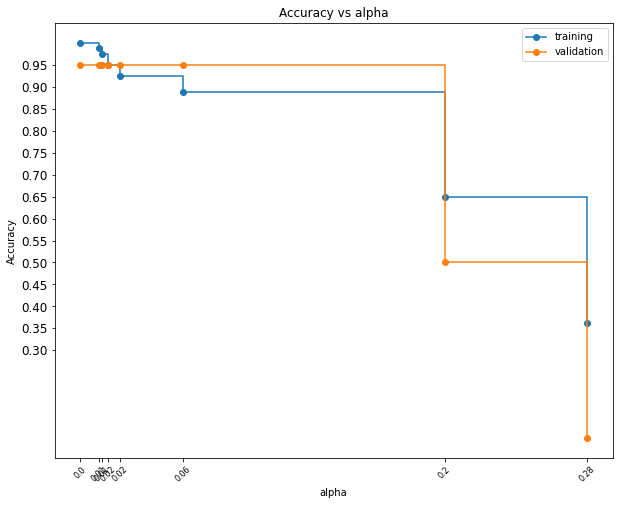

In [10]:
plt.figure(figsize=(10,8))
plt.plot(cpp_alphas, train_scores, marker='o', label='training', drawstyle='steps-post')
plt.plot(cpp_alphas, valid_scores, marker='o', label='validation', drawstyle='steps-post')
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs alpha')
plt.legend()
rounded_cpp = [round(elem, 2) for elem in cpp_alphas]
locs, labels = plt.xticks()
plt.xticks(cpp_alphas, rounded_cpp, rotation=45, fontsize=8)
plt.yticks(np.arange(0.3,1,.05), fontsize=12)
plt.show()

The above plot shows the training and validation accuracy for different values of alpha. The highest validation accuracy is 0.85 which occurs at three value of ccp_alpha at 0.024375, 0.0294181, and 0.0394327.
According to Occam's razor principle, we will select a tree with ccp_alpha = 0.0394327 .
Note: The greater the pruning is, the greater is the complexity reduction, and higher is the value of ccp_alpha.
Finally, the structure of the pruned tree with ccp_alpha set to 0.0394327.. is plotted below

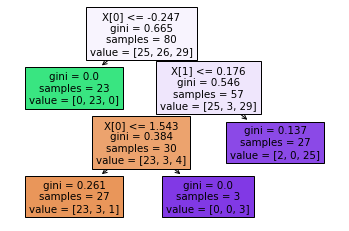

In [11]:
delta = 0.0000001
clf2= DecisionTreeClassifier(ccp_alpha=0.0394327+delta, random_state = 12)
clf2.fit(X_train, y_train)
_ = plot_tree(clf2, filled=True)